# Digit Recognition
This notebook will explore digit recognition using kaggle data. THe goal will be to create a CNN that can predict the digits with above a 98% accuracy.

### Import The Required Packages

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O
import seaborn as sns 
import matplotlib.pyplot as plt
import random
import tensorflow as tf

from tensorflow.keras import datasets, layers, models
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, Flatten, Dropout, MaxPooling2D
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from __future__ import absolute_import, division, print_function, unicode_literals
from collections import Counter
# Enable eager execution


In [2]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')
y_train = train['label']
X_train = train.drop('label', axis=1)

### Preview the data

In [3]:
X_train.head()

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [4]:
labels = train["label"].value_counts()
labels 

1    4684
7    4401
3    4351
9    4188
2    4177
6    4137
0    4132
4    4072
8    4063
5    3795
Name: label, dtype: int64

In [5]:
X_train = X_train/255
y_train.nunique()

10

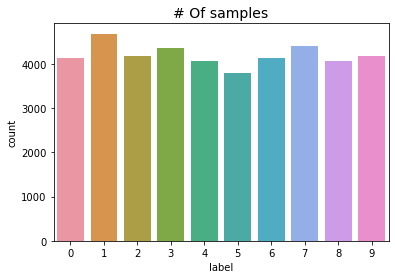

In [6]:
sns.set_palette("Accent")
sns.countplot(x=y_train)
plt.title('# Of samples', size=14)
plt.show()

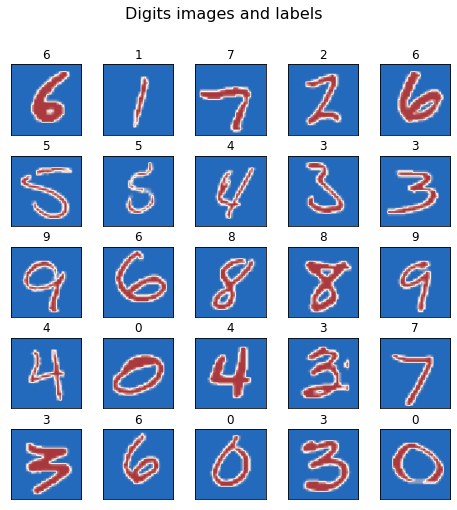

In [7]:
fig, ax = plt.subplots(5, 5, figsize=(8, 8))
fig.suptitle('Digits images and labels', fontsize=16)
ax = ax.ravel()
for i in range(25):
    sample_n = random.randint(0, X_train.shape[0])
    ax[i].imshow(np.array(X_train.iloc[sample_n]).reshape(28, 28), cmap='vlag')
    ax[i].get_xaxis().set_visible(False)
    ax[i].get_yaxis().set_visible(False)
    ax[i].set_title(y_train[sample_n], fontsize = 12)

plt.subplots_adjust(hspace=0.3)

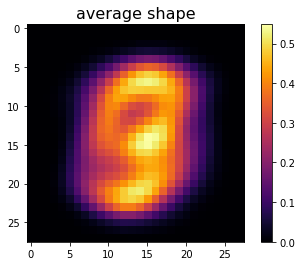

In [8]:
plt.imshow(np.array(X_train.mean()).reshape(28, 28), cmap='inferno')
plt.colorbar()
plt.title('average shape', {'fontsize': 16})
plt.show()

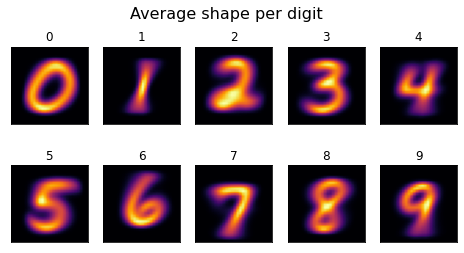

In [9]:
fig, ax = plt.subplots(2, 5, figsize=(8, 4))
fig.suptitle('Average shape per digit', fontsize=16)

ax = ax.ravel()

for i in range(10):
    ax[i].imshow(np.array(train[train['label'] == i].drop('label', axis=1).mean()).reshape(28, 28), cmap='inferno')
    ax[i].get_xaxis().set_visible(False)
    ax[i].get_yaxis().set_visible(False)
    ax[i].set_title(i, fontsize = 12)

In [10]:
X_train_array = np.array(X_train)
X_train_array

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [11]:
test_array = np.array(test)
test_array

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [12]:
X_train_array.shape

(42000, 784)

In [13]:
test_array.shape

(28000, 784)

In [14]:
X_train_array = X_train_array.reshape(42000, 28, 28, 1)
X_train_array.shape

(42000, 28, 28, 1)

In [15]:
test_array = test_array.reshape(-1, 28, 28, 1)
test_array.shape

(28000, 28, 28, 1)

In [16]:
datagen = tf.keras.preprocessing.image.ImageDataGenerator(
    width_shift_range=0.2,
    height_shift_range=0.2,
    fill_mode="constant",
    
    horizontal_flip=False,
    vertical_flip=False,
    
    rotation_range=20,
    
    validation_split=0.2
)

In [17]:
datagen.fit(X_train_array)

In [18]:
tf.random.set_seed(2022)

In [19]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))


In [20]:
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10))


In [21]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])


history_new = model.fit(datagen.flow(X_train_array, y_train, batch_size=250, subset='training'),
                    epochs=250,
                    validation_data=datagen.flow(X_train_array, y_train,
         batch_size=10, subset='validation'))

Epoch 1/250
135/135 [==============================] - 17s 123ms/step - loss: 1.2475 - accuracy: 0.5760 - val_loss: 0.6534 - val_accuracy: 0.7942
Epoch 2/250
135/135 [==============================] - 17s 126ms/step - loss: 0.5124 - accuracy: 0.8403 - val_loss: 0.3845 - val_accuracy: 0.8831
Epoch 3/250
135/135 [==============================] - 17s 124ms/step - loss: 0.3525 - accuracy: 0.8904 - val_loss: 0.3286 - val_accuracy: 0.9001
Epoch 4/250
135/135 [==============================] - 18s 130ms/step - loss: 0.3072 - accuracy: 0.9025 - val_loss: 0.2760 - val_accuracy: 0.9127
Epoch 5/250
135/135 [==============================] - 17s 127ms/step - loss: 0.2529 - accuracy: 0.9222 - val_loss: 0.2631 - val_accuracy: 0.9163
Epoch 6/250
135/135 [==============================] - 17s 128ms/step - loss: 0.2241 - accuracy: 0.9303 - val_loss: 0.2009 - val_accuracy: 0.9380
Epoch 7/250
135/135 [==============================] - 17s 123ms/step - loss: 0.2019 - accuracy: 0.9375 - val_loss: 0.1805 -

Epoch 57/250
135/135 [==============================] - 17s 127ms/step - loss: 0.0520 - accuracy: 0.9837 - val_loss: 0.0715 - val_accuracy: 0.9770
Epoch 58/250
135/135 [==============================] - 17s 128ms/step - loss: 0.0517 - accuracy: 0.9836 - val_loss: 0.0549 - val_accuracy: 0.9826
Epoch 59/250
135/135 [==============================] - 17s 128ms/step - loss: 0.0477 - accuracy: 0.9851 - val_loss: 0.0537 - val_accuracy: 0.9827
Epoch 60/250
135/135 [==============================] - 17s 128ms/step - loss: 0.0516 - accuracy: 0.9832 - val_loss: 0.0578 - val_accuracy: 0.9838
Epoch 61/250
135/135 [==============================] - 17s 127ms/step - loss: 0.0466 - accuracy: 0.9850 - val_loss: 0.0651 - val_accuracy: 0.9789
Epoch 62/250
135/135 [==============================] - 17s 128ms/step - loss: 0.0496 - accuracy: 0.9843 - val_loss: 0.0642 - val_accuracy: 0.9820
Epoch 63/250
135/135 [==============================] - 17s 129ms/step - loss: 0.0488 - accuracy: 0.9852 - val_loss: 0

135/135 [==============================] - 17s 126ms/step - loss: 0.0298 - accuracy: 0.9913 - val_loss: 0.0440 - val_accuracy: 0.9864
Epoch 113/250
135/135 [==============================] - 17s 126ms/step - loss: 0.0300 - accuracy: 0.9899 - val_loss: 0.0424 - val_accuracy: 0.9865
Epoch 114/250
135/135 [==============================] - 17s 126ms/step - loss: 0.0276 - accuracy: 0.9912 - val_loss: 0.0469 - val_accuracy: 0.9871
Epoch 115/250
135/135 [==============================] - 17s 127ms/step - loss: 0.0296 - accuracy: 0.9906 - val_loss: 0.0483 - val_accuracy: 0.9855
Epoch 116/250
135/135 [==============================] - 17s 127ms/step - loss: 0.0273 - accuracy: 0.9912 - val_loss: 0.0578 - val_accuracy: 0.9835
Epoch 117/250
135/135 [==============================] - 17s 129ms/step - loss: 0.0292 - accuracy: 0.9909 - val_loss: 0.0487 - val_accuracy: 0.9850
Epoch 118/250
135/135 [==============================] - 17s 129ms/step - loss: 0.0276 - accuracy: 0.9910 - val_loss: 0.0459 -

135/135 [==============================] - 17s 129ms/step - loss: 0.0219 - accuracy: 0.9929 - val_loss: 0.0399 - val_accuracy: 0.9889
Epoch 168/250
135/135 [==============================] - 17s 128ms/step - loss: 0.0225 - accuracy: 0.9928 - val_loss: 0.0454 - val_accuracy: 0.9870
Epoch 169/250
135/135 [==============================] - 17s 128ms/step - loss: 0.0207 - accuracy: 0.9936 - val_loss: 0.0430 - val_accuracy: 0.9883
Epoch 170/250
135/135 [==============================] - 17s 127ms/step - loss: 0.0214 - accuracy: 0.9930 - val_loss: 0.0422 - val_accuracy: 0.9883
Epoch 171/250
135/135 [==============================] - 17s 128ms/step - loss: 0.0188 - accuracy: 0.9942 - val_loss: 0.0448 - val_accuracy: 0.9879
Epoch 172/250
135/135 [==============================] - 17s 128ms/step - loss: 0.0225 - accuracy: 0.9931 - val_loss: 0.0383 - val_accuracy: 0.9896
Epoch 173/250
135/135 [==============================] - 17s 128ms/step - loss: 0.0198 - accuracy: 0.9937 - val_loss: 0.0463 -

135/135 [==============================] - 17s 125ms/step - loss: 0.0168 - accuracy: 0.9944 - val_loss: 0.0494 - val_accuracy: 0.9875
Epoch 223/250
135/135 [==============================] - 17s 127ms/step - loss: 0.0187 - accuracy: 0.9937 - val_loss: 0.0350 - val_accuracy: 0.9898
Epoch 224/250
135/135 [==============================] - 17s 125ms/step - loss: 0.0174 - accuracy: 0.9946 - val_loss: 0.0463 - val_accuracy: 0.9877
Epoch 225/250
135/135 [==============================] - 17s 123ms/step - loss: 0.0170 - accuracy: 0.9946 - val_loss: 0.0438 - val_accuracy: 0.9881
Epoch 226/250
135/135 [==============================] - 17s 128ms/step - loss: 0.0175 - accuracy: 0.9949 - val_loss: 0.0433 - val_accuracy: 0.9886
Epoch 227/250
135/135 [==============================] - 18s 131ms/step - loss: 0.0155 - accuracy: 0.9947 - val_loss: 0.0436 - val_accuracy: 0.9883
Epoch 228/250
135/135 [==============================] - 17s 129ms/step - loss: 0.0190 - accuracy: 0.9941 - val_loss: 0.0387 -

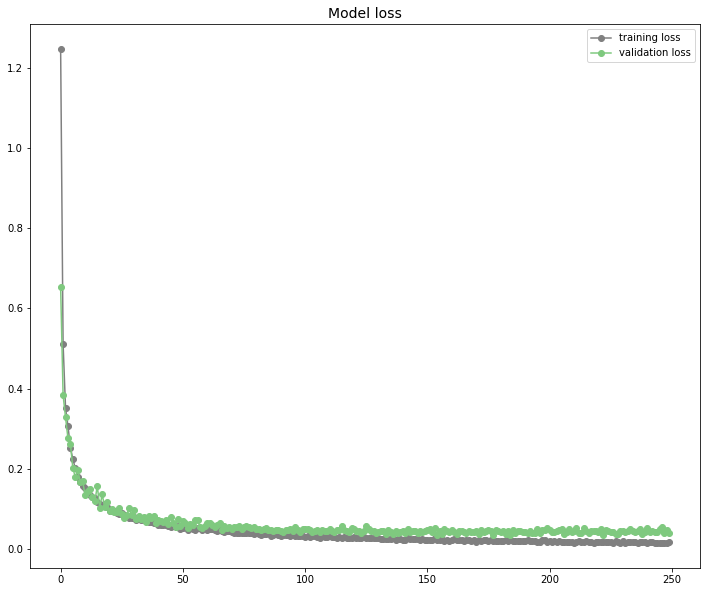

In [22]:
plt.figure(figsize = (12,10))
plt.title('Model loss', fontsize = 14)
plt.plot(range(len(history_new.history['loss'])), history_new.history['loss'], marker='o', c='gray')
plt.plot(range(len(history_new.history['loss'])), history_new.history['val_loss'], marker='o')
plt.legend(labels=['training loss', 'validation loss'])
plt.show()

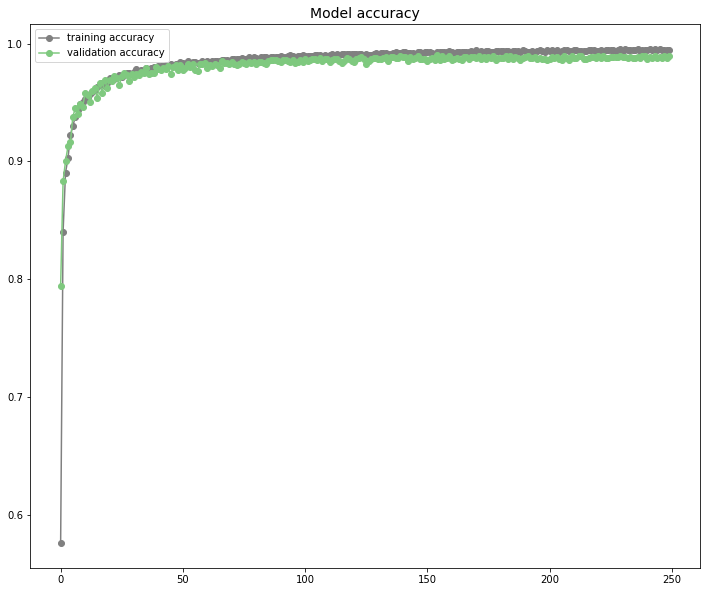

In [23]:
plt.figure(figsize = (12,10))
plt.title('Model accuracy', fontsize = 14)
plt.plot(range(len(history_new.history['loss'])), history_new.history['accuracy'], c='gray', marker='o')
plt.plot(range(len(history_new.history['loss'])), history_new.history['val_accuracy'], marker='o')
plt.legend(labels=['training accuracy', 'validation accuracy'])
plt.show()



## View the Testing data

<ipython-input-24-4cd76179013b>:15: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


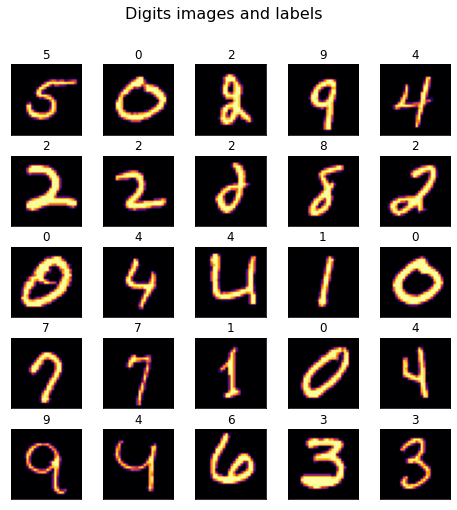

In [24]:
test_array = test_array / 255
test_result = model.predict(test_array)
test_result = np.array(pd.DataFrame(test_result).idxmax(axis=1))
fig, ax = plt.subplots(5, 5, figsize=(8, 8))
fig.suptitle('Digits images and labels', fontsize=16)
ax = ax.ravel()
for i in range(25):
    sample_n = random.randint(0, test.shape[0])
    ax[i].imshow(np.array(test.iloc[sample_n]).reshape(28, 28), cmap='inferno')
    ax[i].get_xaxis().set_visible(False)
    ax[i].get_yaxis().set_visible(False)
    ax[i].set_title(test_result[sample_n], fontsize = 12)

plt.subplots_adjust(hspace=0.3)
fig.show()

In [25]:
ev = model.evaluate(X_train_array, y_train)
ev

1313/1313 [==============================] - 7s 6ms/step - loss: 0.0129 - accuracy: 0.9965


[0.012928825803101063, 0.9964761734008789]

In [26]:
pred = np.array(pd.DataFrame(test_result).idxmax(axis=1))

In [27]:
predicted_data = pd.DataFrame({
    'ImageId': test.index+1,
    'Label': test_result
})


In [28]:
predicted_data.head()

,ImageId,Label
0,1,2
1,2,0
2,3,9
3,4,0
4,5,3


In [30]:
predicted_data.to_csv('pred.csv', index=False)